# Mall Customer Segmentation: <font color='blue'>K-Means Clustering</font> & <font color='red'>Hierarchical Clustering</font> 
* Importing the libraries
* Importing the dataset
* Dataset information (Pandas Profiling)
* Elbow method to find the optimal number of clusters
* Using the dendrogram to find the optimal number of clusters
* Training the K-Means model on the dataset
* Training the Hierarchical Clustering model on the dataset
* Visualising the K-means clusters
* Visualising the Hierarchical clusters
* **Conclusion**


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [2]:
dataset = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Dataset information (Pandas Profiling) 

In [3]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
pp.ProfileReport(dataset, title = 'Pandas Profiling report of "dataset"', html = {'style':{'full_width': True}})

## <font color='blue'>Elbow method to find the optimal number of clusters</font>

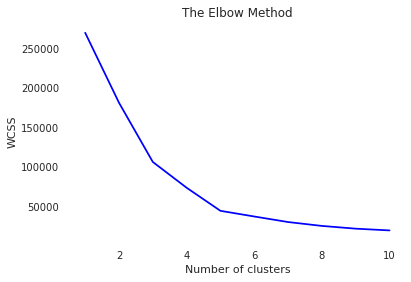

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, c = 'blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## <font color='red'>Using the dendrogram to find the optimal number of clusters</font>

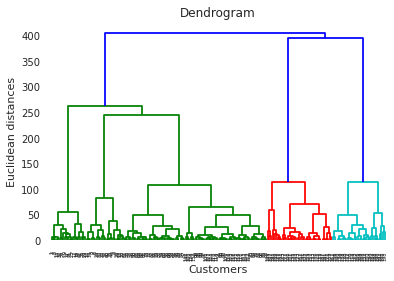

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## <font color='blue'>Training the K-Means model on the dataset</font>

In [7]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## <font color='red'>Training the Hierarchical Clustering model on the dataset</font>

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## <font color='blue'>Visualising the K-Means clusters</font>

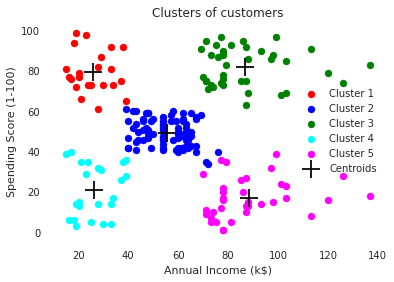

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, marker = '+', c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## <font color='red'>Visualising the Hierarchical clusters</font>

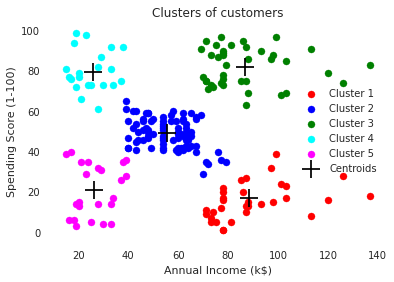

In [10]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, marker = '+', c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# <font color='green'>conclusion</font>
* **For large number of data K-Means Clustering is always good.**
* **Reason: It's easy to find the optimal no of clusters in K-Means because of elbow method. (we can't find the optimal no of clusters accuratley by using dendogram for large number of data. hence, for large number of data Hierarchical clustering is not possible)**

